In [1]:
import pandas as pd

df = pd.read_csv("./data/train.csv")

In [4]:
# Target 비율 확인
df['임신 성공 여부'].value_counts()

임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64

In [7]:
len(df)

256351

In [5]:
# 각 컬럼별 결측치 개수와 비율 계산
missing_counts = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

# 결측치가 존재하는 컬럼만 선택하여 DataFrame 생성
missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

# 결측치가 없는 컬럼은 제외하고, 결측치 비율 기준으로 내림차순 정렬
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

# 결과 출력
missing_info


## 결과
## 전체 데이터는 256,351로서 결측치가 95% 이상 되는 것들은 없애고 진행해도 좋을 것 같다.
## 다만, 중요한 정보를 놓칠 수도 있기 때문에 이후 추가적인 검증이 필요할 듯 싶다.

,Missing Count,Missing Percentage
난자 해동 경과일,254915,99.439831
PGS 시술 여부,254422,99.247516
PGD 시술 여부,254172,99.149994
착상 전 유전 검사 사용 여부,253633,98.939735
임신 시도 또는 마지막 임신 경과 연수,246981,96.344855
배아 해동 경과일,215982,84.252451
난자 채취 경과일,57488,22.425503
난자 혼합 경과일,53735,20.961494
배아 이식 경과일,43566,16.994667
저장된 배아 수,6291,2.454057


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 설치된 폰트 중 하나 선택
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [3]:
import seaborn as sns

# 폰트 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus": False})

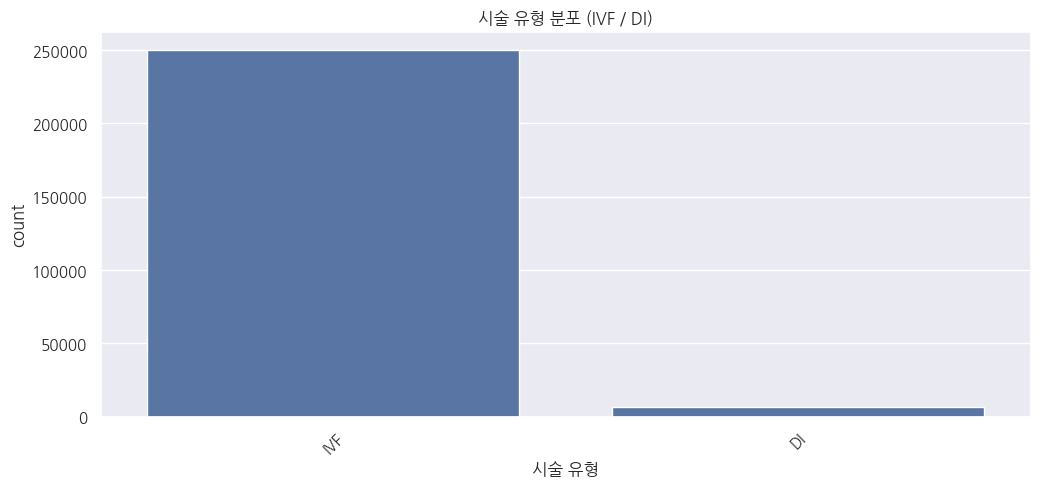

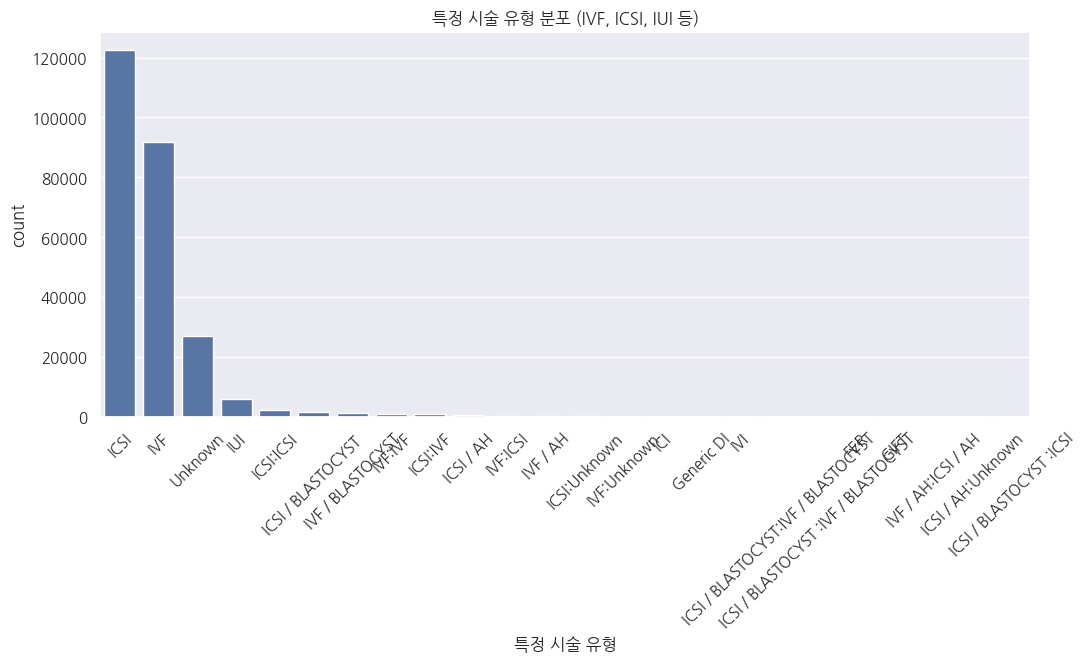

In [4]:
import seaborn as sns

success_column = '임신 성공 여부'

# 1. 시술 유형별 분석
## 1-1. '시술 유형'과 '특정 시술 유형' 분포
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='시술 유형', order=df['시술 유형'].value_counts().index)
plt.title('시술 유형 분포 (IVF / DI)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='특정 시술 유형', order=df['특정 시술 유형'].value_counts().index)
plt.title('특정 시술 유형 분포 (IVF, ICSI, IUI 등)')
plt.xticks(rotation=45)
plt.show()


In [5]:
## 1-2. 각 시술 유형별 임신 성공률
treatment_success = df.groupby('시술 유형')[success_column].mean().sort_values(ascending=False)
treatment_specific_success = df.groupby('특정 시술 유형')[success_column].mean().sort_values(ascending=False)

# 결과 출력
print("시술 유형별 임신 성공률:")
print(treatment_success)

print("\n특정 시술 유형별 임신 성공률:")
print(treatment_specific_success)

시술 유형별 임신 성공률:
시술 유형
IVF    0.261605
DI     0.128914
Name: 임신 성공 여부, dtype: float64

특정 시술 유형별 임신 성공률:
특정 시술 유형
ICSI / BLASTOCYST :ICSI                1.000000
ICSI / AH:Unknown                      0.500000
IVF / BLASTOCYST                       0.366186
ICSI / BLASTOCYST                      0.356743
FER                                    0.333333
ICSI / BLASTOCYST:IVF / BLASTOCYST     0.333333
IVF:ICSI                               0.283163
ICSI                                   0.272825
IVF                                    0.261457
ICSI / BLASTOCYST :IVF / BLASTOCYST    0.250000
Unknown                                0.237203
ICSI:IVF                               0.234822
ICSI / AH                              0.217165
IVF / AH                               0.184953
IVF:Unknown                            0.170000
Generic DI                             0.169014
ICI                                    0.135417
IUI                                    0.128525
ICSI:Unknown            

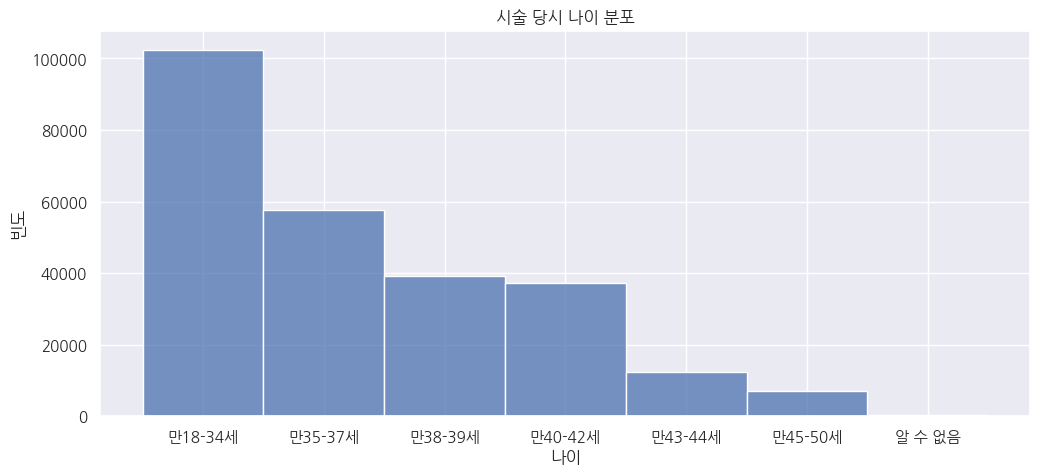

In [11]:
# 나이대 순서를 직접 정의
age_order = ['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세', '알 수 없음']

# '시술 당시 나이'를 카테고리형 데이터로 변환하여 순서 지정
df['시술 당시 나이'] = pd.Categorical(df['시술 당시 나이'], categories=age_order, ordered=True)

# 시술 당시 나이 분포 시각화 (정렬된 순서)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='시술 당시 나이', order=age_order)
plt.title('시술 당시 나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()


In [12]:
## 2-2. 각 연령대별 임신 성공률
age_success = df.groupby('시술 당시 나이')[success_column].mean().sort_values(ascending=False)

# 결과 출력
print("\n연령대별 임신 성공률:")
print(age_success)


연령대별 임신 성공률:
시술 당시 나이
만18-34세    0.322622
만35-37세    0.278401
만38-39세    0.217138
만45-50세    0.167679
만40-42세    0.159393
만43-44세    0.118012
알 수 없음     0.000000
Name: 임신 성공 여부, dtype: float64


/tmp/ipykernel_81546/3832157836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_success = df.groupby('시술 당시 나이')[success_column].mean().sort_values(ascending=False)


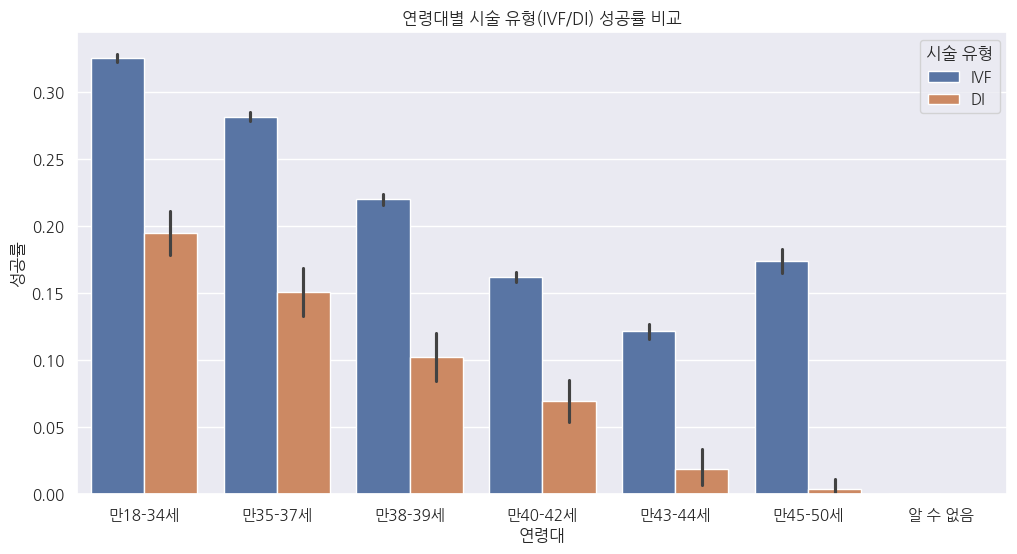

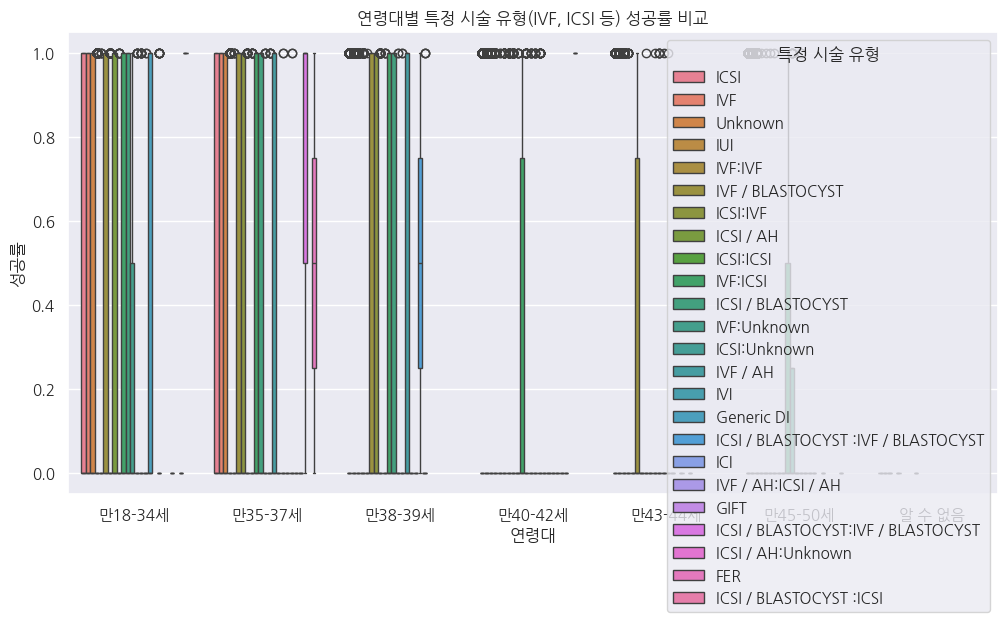

In [14]:

# 성공 여부 컬럼
success_column = '임신 성공 여부'
age_column = '시술 당시 나이'
treatment_column = '시술 유형'
specific_treatment_column = '특정 시술 유형'

## 1. 연령대 & 시술 유형 교차 분석
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x=age_column, y=success_column, hue=treatment_column)
plt.title("연령대별 시술 유형(IVF/DI) 성공률 비교")
plt.xlabel("연령대")
plt.ylabel("성공률")
plt.legend(title="시술 유형")
plt.show()

## 특정 시술 유형별 연령대 성공률 분석
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=age_column, y=success_column, hue=specific_treatment_column)
plt.title("연령대별 특정 시술 유형(IVF, ICSI 등) 성공률 비교")
plt.xlabel("연령대")
plt.ylabel("성공률")
plt.legend(title="특정 시술 유형", loc="upper right")
plt.show()


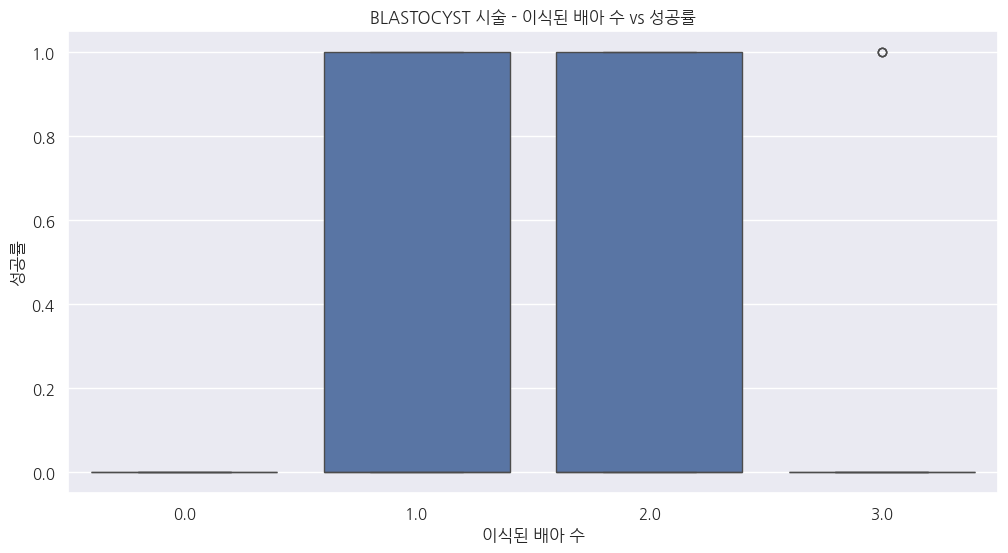

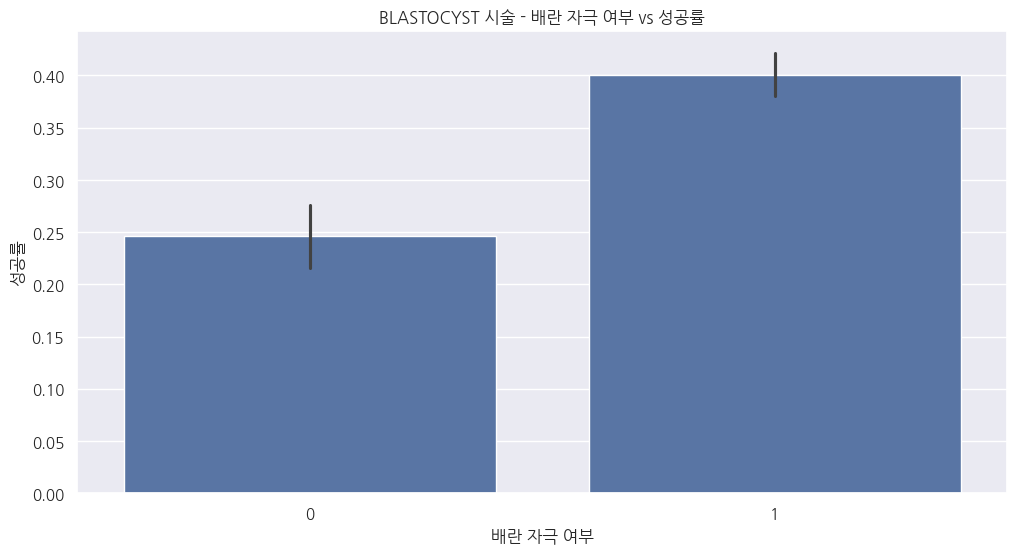

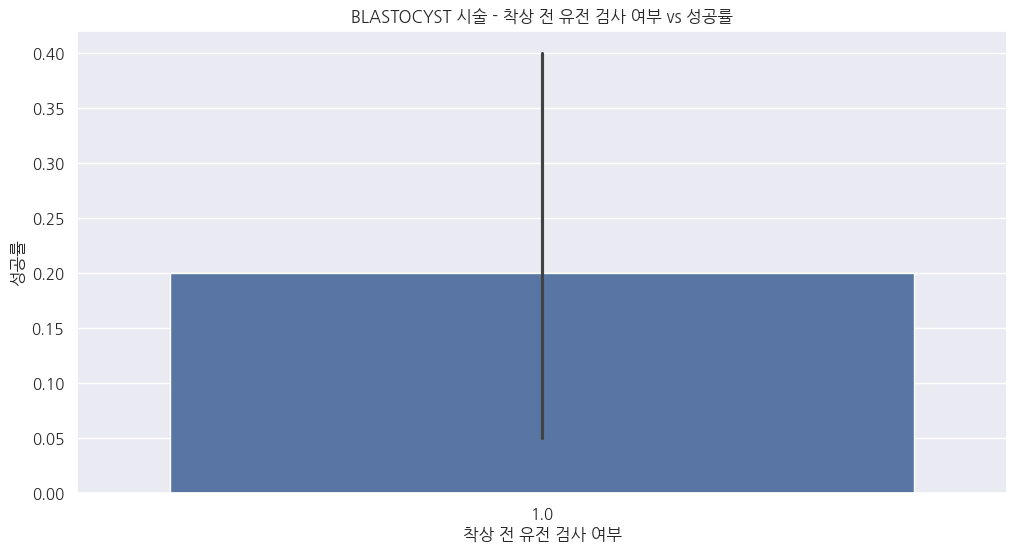

In [15]:
# 2. BLASTOCYST 시술과 다른 변수와의 연관성 분석
# BLASTOCYST 관련 데이터 필터링
blastocyst_df = df[df[specific_treatment_column].str.contains("BLASTOCYST", na=False)]

# 배아 이식 수와 성공률 관계
plt.figure(figsize=(12, 6))
sns.boxplot(data=blastocyst_df, x="이식된 배아 수", y=success_column)
plt.title("BLASTOCYST 시술 - 이식된 배아 수 vs 성공률")
plt.xlabel("이식된 배아 수")
plt.ylabel("성공률")
plt.show()

# 배란 자극 여부와 성공률 관계
plt.figure(figsize=(12, 6))
sns.barplot(data=blastocyst_df, x="배란 자극 여부", y=success_column)
plt.title("BLASTOCYST 시술 - 배란 자극 여부 vs 성공률")
plt.xlabel("배란 자극 여부")
plt.ylabel("성공률")
plt.show()

# 착상 전 유전 검사(PGS/PGD) 사용 여부와 성공률 관계
plt.figure(figsize=(12, 6))
sns.barplot(data=blastocyst_df, x="착상 전 유전 검사 사용 여부", y=success_column)
plt.title("BLASTOCYST 시술 - 착상 전 유전 검사 여부 vs 성공률")
plt.xlabel("착상 전 유전 검사 여부")
plt.ylabel("성공률")
plt.show()


In [21]:
# 출력할 최대 열 개수 증가 (모든 열 표시)
pd.set_option('display.max_columns', None)

# 가로로 길어지는 경우 줄바꿈 없이 표시
pd.set_option('display.expand_frame_repr', False)

In [22]:
## 1. 연령대 & 시술 유형 교차 분석
# 연령대별 시술 유형 성공률
age_treatment_success = df.groupby([age_column, treatment_column])[success_column].mean().unstack()
print("연령대별 시술 유형(IVF/DI) 성공률 비교:")
print(age_treatment_success)
print("\n" + "="*50 + "\n")

# 연령대별 특정 시술 유형 성공률
age_specific_treatment_success = df.groupby([age_column, specific_treatment_column])[success_column].mean().unstack()
print("연령대별 특정 시술 유형 성공률 비교:")
print(age_specific_treatment_success)
print("\n" + "="*50 + "\n")


연령대별 시술 유형(IVF/DI) 성공률 비교:
시술 유형           DI       IVF
시술 당시 나이                    
만18-34세   0.194592  0.325263
만35-37세   0.151034  0.281679
만38-39세   0.102564  0.220296
만40-42세   0.069498  0.161957
만43-44세   0.019093  0.121514
만45-50세   0.003817  0.174129
알 수 없음         NaN  0.000000


연령대별 특정 시술 유형 성공률 비교:
특정 시술 유형  FER  GIFT  Generic DI       ICI      ICSI  ICSI / AH  ICSI / AH:Unknown  ICSI / BLASTOCYST   ICSI / BLASTOCYST :ICSI  ICSI / BLASTOCYST :IVF / BLASTOCYST  ICSI / BLASTOCYST:IVF / BLASTOCYST  ICSI:ICSI  ICSI:IVF  ICSI:Unknown       IUI       IVF  IVF / AH  IVF / AH:ICSI / AH  IVF / BLASTOCYST  IVF:ICSI   IVF:IVF  IVF:Unknown       IVI   Unknown
시술 당시 나이                                                                                                                                                                                                                                                                                                                                    

/tmp/ipykernel_81546/2558818206.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_treatment_success = df.groupby([age_column, treatment_column])[success_column].mean().unstack()
/tmp/ipykernel_81546/2558818206.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_specific_treatment_success = df.groupby([age_column, specific_treatment_column])[success_column].mean().unstack()


In [20]:
## 2. BLASTOCYST 시술과 다른 변수와의 연관성 분석
# BLASTOCYST 관련 데이터 필터링
blastocyst_df = df[df[specific_treatment_column].str.contains("BLASTOCYST", na=False)]

# 이식된 배아 수별 성공률
blastocyst_embryo_transfer = blastocyst_df.groupby("이식된 배아 수")[success_column].mean()
print("BLASTOCYST 시술 - 이식된 배아 수별 성공률:")
print(blastocyst_embryo_transfer)
print("\n" + "="*50 + "\n")

# 배란 자극 여부별 성공률
blastocyst_ovulation_stimulation = blastocyst_df.groupby("배란 자극 여부")[success_column].mean()
print("BLASTOCYST 시술 - 배란 자극 여부별 성공률:")
print(blastocyst_ovulation_stimulation)
print("\n" + "="*50 + "\n")

# 착상 전 유전 검사 사용 여부별 성공률
blastocyst_genetic_test = blastocyst_df.groupby("착상 전 유전 검사 사용 여부")[success_column].mean()
print("BLASTOCYST 시술 - 착상 전 유전 검사 사용 여부별 성공률:")
print(blastocyst_genetic_test)
print("\n" + "="*50 + "\n")

BLASTOCYST 시술 - 이식된 배아 수별 성공률:
이식된 배아 수
0.0    0.000000
1.0    0.376633
2.0    0.373362
3.0    0.100000
Name: 임신 성공 여부, dtype: float64


BLASTOCYST 시술 - 배란 자극 여부별 성공률:
배란 자극 여부
0    0.245924
1    0.400563
Name: 임신 성공 여부, dtype: float64


BLASTOCYST 시술 - 착상 전 유전 검사 사용 여부별 성공률:
착상 전 유전 검사 사용 여부
1.0    0.2
Name: 임신 성공 여부, dtype: float64




In [32]:
# 총 시술 횟수별 성공률 계산
treatment_count_success = df.groupby('총 시술 횟수')[success_column].mean()

# 출력
print("총 시술 횟수별 성공률:")
print(treatment_count_success)


총 시술 횟수별 성공률:
총 시술 횟수
0회       0.290987
1회       0.249952
2회       0.244166
3회       0.236354
4회       0.227792
5회       0.215792
6회 이상    0.203300
Name: 임신 성공 여부, dtype: float64



불임 원인 - 난관 질환별 성공률:
불임 원인 - 난관 질환
0    0.258445
1    0.257755
Name: 임신 성공 여부, dtype: float64

불임 원인 - 남성 요인별 성공률:
불임 원인 - 남성 요인
0    0.245567
1    0.279890
Name: 임신 성공 여부, dtype: float64

불임 원인 - 배란 장애별 성공률:
불임 원인 - 배란 장애
0    0.254108
1    0.286633
Name: 임신 성공 여부, dtype: float64

불임 원인 - 여성 요인별 성공률:
불임 원인 - 여성 요인
0    0.258349
Name: 임신 성공 여부, dtype: float64

불임 원인 - 자궁경부 문제별 성공률:
불임 원인 - 자궁경부 문제
0    0.258359
1    0.000000
Name: 임신 성공 여부, dtype: float64

불임 원인 - 자궁내막증별 성공률:
불임 원인 - 자궁내막증
0    0.258619
1    0.254836
Name: 임신 성공 여부, dtype: float64

불임 원인 - 정자 농도별 성공률:
불임 원인 - 정자 농도
0    0.258358
1    0.250000
Name: 임신 성공 여부, dtype: float64

불임 원인 - 정자 면역학적 요인별 성공률:
불임 원인 - 정자 면역학적 요인
0    0.25835
1    0.00000
Name: 임신 성공 여부, dtype: float64

불임 원인 - 정자 운동성별 성공률:
불임 원인 - 정자 운동성
0    0.258380
1    0.175258
Name: 임신 성공 여부, dtype: float64

불임 원인 - 정자 형태별 성공률:
불임 원인 - 정자 형태
0    0.258368
1    0.223776
Name: 임신 성공 여부, dtype: float64


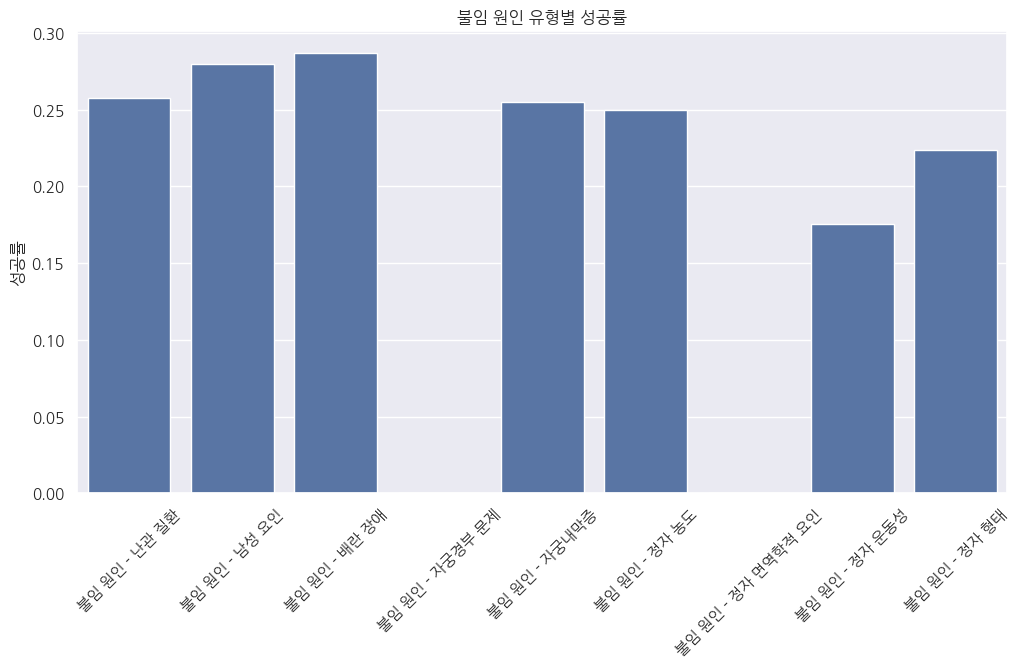

In [26]:
# 불임 원인 관련 컬럼 목록
infertility_columns = [
    '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', 
    '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증', 
    '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', 
    '불임 원인 - 정자 형태'
]

# 불임 원인별 성공률 계산
infertility_success = {}
for col in infertility_columns:
    infertility_success[col] = df.groupby(col)[success_column].mean()

# 결과 출력
for col, success_rate in infertility_success.items():
    print(f"\n{col}별 성공률:")
    print(success_rate)

# 불임 원인별 성공률 시각화
plt.figure(figsize=(12, 6))
infertility_means = {col: df.groupby(col)[success_column].mean()[1] for col in infertility_columns if 1 in df[col].unique()}
sns.barplot(x=list(infertility_means.keys()), y=list(infertility_means.values()))
plt.xticks(rotation=45)
plt.ylabel("성공률")
plt.title("불임 원인 유형별 성공률")
plt.show()


## 초기 전략


1️⃣ 데이터 전처리 전략
- 높은 결측률(>95%) 컬럼 제거
  * 난자 해동 경과일, PGS/PGD 시술 여부 등
- 범주형 변수 인코딩
  * 시술 유형: 성공률 기반 인코딩 (WOE 또는 target encoding)
  * 연령대: 순서형 인코딩
- 연속형 변수 처리
  * 이식된 배아 수, 경과일 등의 스케일링
  * 결측치는 평균/중앙값 대체

2️⃣ 피처 엔지니어링
- 상호작용 변수 생성
  * 연령대 × 시술유형
  * 배아 수 × BLASTOCYST 여부
- 집계 피처
  * 이전 시술 성공률
  * 연령대별 평균 성공률
- 시술 관련 복합 피처
  * 배아/난자 비율
  * 시술 간격

3️⃣ 모델링 접근
- 초기 모델
  * LightGBM을 기본 모델로 사용
  * Stratified K-fold (불균형 데이터)
  * ROC-AUC 최적화
- 앙상블 전략
  * 다양한 기본 모델 결합
  * 서로 다른 피처셋 활용

